In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "low_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

14it [00:00, 138.14it/s]

27it [00:00, 133.04it/s]

34it [00:00, 100.09it/s]

50it [00:00, 111.63it/s]

66it [00:00, 122.12it/s]

79it [00:00, 122.76it/s]

93it [00:00, 124.89it/s]

108it [00:00, 130.80it/s]

121it [00:00, 116.10it/s]

135it [00:01, 120.44it/s]

151it [00:01, 129.28it/s]

167it [00:01, 137.16it/s]

182it [00:01, 140.27it/s]

197it [00:01, 119.72it/s]

213it [00:01, 128.69it/s]

229it [00:01, 135.71it/s]

245it [00:01, 140.91it/s]

261it [00:01, 144.58it/s]

277it [00:02, 147.87it/s]

293it [00:02, 149.71it/s]

309it [00:02, 151.74it/s]

325it [00:02, 151.79it/s]

341it [00:02, 153.53it/s]

357it [00:02, 130.33it/s]

371it [00:02, 119.43it/s]

384it [00:02, 111.56it/s]

396it [00:03, 109.92it/s]

412it [00:03, 119.99it/s]

425it [00:03, 120.03it/s]

441it [00:03, 128.44it/s]

457it [00:03, 136.14it/s]

473it [00:03, 141.37it/s]

489it [00:03, 145.86it/s]

504it [00:03, 139.98it/s]

519it [00:03, 141.88it/s]

535it [00:03, 145.28it/s]

550it [00:04, 123.95it/s]

553it [00:04, 132.16it/s]


0it [00:00, ?it/s]

14it [00:00, 133.33it/s]

Number of empty sat catalogs is 0


25it [00:00, 122.15it/s]

41it [00:00, 131.47it/s]

58it [00:00, 139.94it/s]

74it [00:00, 145.41it/s]

91it [00:00, 149.66it/s]

105it [00:00, 144.30it/s]

119it [00:00, 125.98it/s]

132it [00:00, 121.47it/s]

149it [00:01, 131.28it/s]

165it [00:01, 136.78it/s]

179it [00:01, 129.19it/s]

195it [00:01, 137.07it/s]

211it [00:01, 142.48it/s]

227it [00:01, 146.19it/s]

243it [00:01, 149.73it/s]

259it [00:01, 151.36it/s]

276it [00:01, 154.63it/s]

293it [00:02, 156.68it/s]

310it [00:02, 158.08it/s]

326it [00:02, 152.57it/s]

342it [00:02, 133.58it/s]

356it [00:02, 122.18it/s]

369it [00:02, 116.05it/s]

384it [00:02, 123.54it/s]

400it [00:02, 130.55it/s]

414it [00:03, 117.74it/s]

427it [00:03, 120.48it/s]

441it [00:03, 123.85it/s]

456it [00:03, 128.79it/s]

473it [00:03, 137.29it/s]

489it [00:03, 142.64it/s]

505it [00:03, 146.92it/s]

521it [00:03, 150.28it/s]

538it [00:03, 153.07it/s]

553it [00:03, 139.92it/s]

Number of empty sat catalogs is 0


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

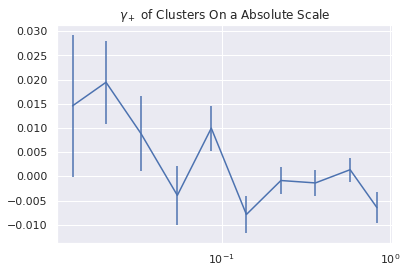

Aggregated xi:
[-1.2092 -3.48   -2.5129  1.9871 -9.1424 12.1608  2.0883  4.4762 -5.1222
 12.1709]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -359.623   -693.9125  -968.7822 -1466.7827 -2241.7575 -3027.593
 -3597.9545 -3357.0817 -2057.7562  -348.742 ]
------------------------------------------------------------------------------
Aggregated npairs:
[  83.  179.  285.  505.  918. 1542. 2409. 3282. 3742. 1885.]
------------------------------------------------------------------------------
Mean xi:
[-0.0146 -0.0194 -0.0088  0.0039 -0.01    0.0079  0.0009  0.0014 -0.0014
  0.0065]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3328 -3.8766 -3.3992 -2.9045 -2.442  -1.9634 -1.4935 -1.0229 -0.5499
 -0.185 ]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

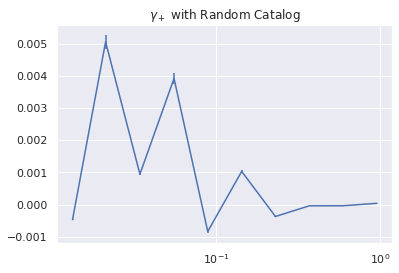

[-4.6180e-04  5.0577e-03  9.4782e-04  3.9211e-03 -8.3240e-04  1.0338e-03
 -3.6639e-04 -3.5451e-05 -3.3461e-05  4.2813e-05]
[ 1.9638e-05 -2.1507e-04 -4.0305e-05 -1.6674e-04  3.5397e-05 -4.3961e-05
  1.5580e-05  1.5076e-06  1.4229e-06 -1.8206e-06]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

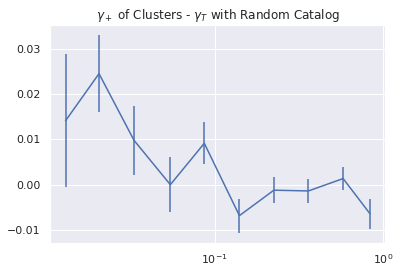

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

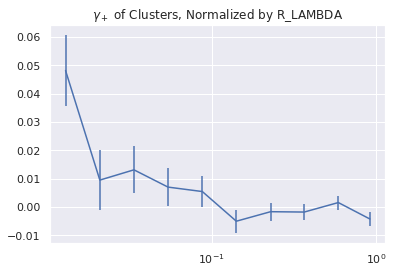

Aggregated xi:
[-2.0248 -1.3039 -3.0624 -2.564  -3.9701  6.3123  3.2836  5.2667 -5.8135
 14.4879]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -182.4336  -529.3984  -789.2604 -1059.5778 -1762.7262 -2470.3559
 -2959.4107 -3002.4463 -1940.1099  -303.9192]
------------------------------------------------------------------------------
Aggregated npairs:
[  42.  137.  233.  364.  725. 1263. 2004. 2982. 3660. 3433.]
------------------------------------------------------------------------------
Mean xi:
[-0.0482 -0.0095 -0.0131 -0.007  -0.0055  0.005   0.0016  0.0018 -0.0016
  0.0042]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3437 -3.8642 -3.3874 -2.9109 -2.4313 -1.9559 -1.4768 -1.0069 -0.5301
 -0.0885]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)